########## Iteration: 0 ##########

Weights: [ -6.24256589e+02   4.50227852e-01   4.12141001e+01   4.71866848e+01
   2.15747671e+00   1.83157064e+01  -2.41349110e+00]
Prediction(10): -277.185788239
MSE(Dom): 127.13102612 ,Loss: 127.13102612

########## Iteration: 1 ##########

Weights: [ -6.08059220e+02   3.86931609e-02   3.82086282e+01   4.80848719e+01
   2.39990454e+00   1.89124658e+01  -2.21669280e+00]
Prediction(10): -274.123070993
MSE(Dom): 127.499368905 ,Loss: 127.499368905

########## Iteration: 2 ##########

Weights: [ -6.10138095e+02  -8.92324626e-02   3.83943995e+01   4.82659568e+01
   2.39462030e+00   1.89199993e+01  -2.21426266e+00]
Prediction(10): -275.373574198
MSE(Dom): 127.429730798 ,Loss: 127.429730798

########## Iteration: 3 ##########

Weights: [ -6.12174544e+02  -2.14547359e-01   3.85763797e+01   4.84433462e+01
   2.38944390e+00   1.89273791e+01  -2.21188213e+00]
Prediction(10): -276.598556929
MSE(Dom): 127.249642239 ,Loss: 127.249642239

########## Iteration: 4 ##

Prediction(10): 179.490212435
MSE(Dom): 127.309091349 ,Loss: 127.309091349

########## Iteration: 87 ##########

Weights: [-603.44704402   -0.84399313   37.11781368   48.92155282    2.41998159
   18.81955088   -2.25688007]
Prediction(10): 180.096432537
MSE(Dom): 127.445947308 ,Loss: 127.445947308

########## Iteration: 88 ##########

Weights: [-605.03689896   -0.97125964   37.31356052   48.9793016     2.42478718
   18.62977443   -2.13795515]
Prediction(10): 180.458610577
MSE(Dom): 127.372779211 ,Loss: 127.372779211

########## Iteration: 89 ##########

Weights: [-614.82510306    1.08250296   38.59686953   48.01152167    2.4769309
   19.15904782   -2.36255421]
Prediction(10): 179.730836632
MSE(Dom): 127.462517597 ,Loss: 127.462517597

########## Iteration: 90 ##########

Weights: [-614.37661237    1.03531338   38.57059521   48.00653499    2.47930233
   19.14685497   -2.35661165]
Prediction(10): 179.750782626
MSE(Dom): 127.466804116 ,Loss: 127.466804116

########## Iteration: 91 ########

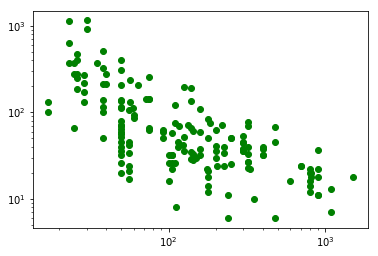

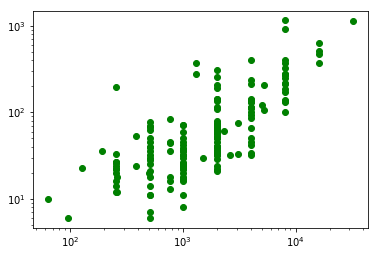

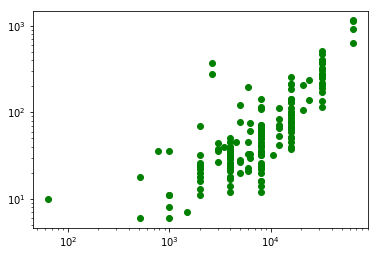

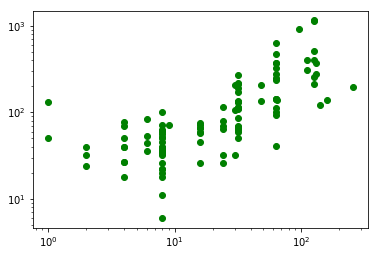

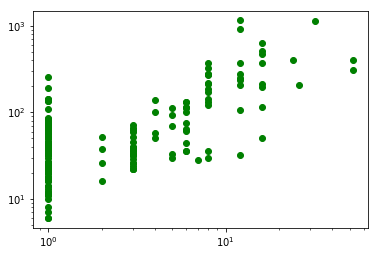

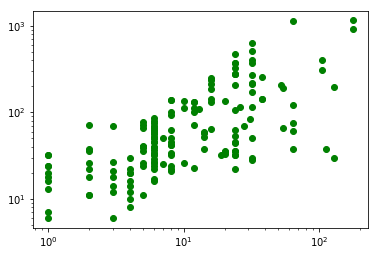

In [81]:
from IPython.display import IFrame
import pylab as plt
%matplotlib inline
import numpy as np
#%%javascript
#IPython.OutputArea.auto_scroll_threshold = 9999;

# Define some utility functions

#Calculates a loss using a design matrix (X), a set of responses (y) and a parameter vector (w)
def calculate_loss(inputs,responses,weights):
    loss = 0
    N = inputs.shape[0]
    X = inputs
    y = responses
    w = weights
    
    for i in range(N):
        y_i = y[i]
        dot_i = np.dot(w.T,X[i])
        loss += ((y_i-dot_i)**2)
    loss = (np.sqrt(loss * (1/N)))
    return loss

def mse(actual, prediction, N):
    return np.sqrt(np.sum((actual-prediction)**2)/N)

#Calculate optimum weights using the Normal Equation: w=(X(T)X)-1X(T)y
def calc_weights(inputs,responses):
    X = inputs
    y = responses
    
    XX = np.dot(X.T, X)
    invXX = np.linalg.inv(XX)
    Xy = np.dot(X.T, y)
    w = np.dot(invXX, Xy)
    return w
    
def calc_LOOCV_loss(inputs, responses):
    N = inputs.shape[0]
    totalLoss = 0
    for i in range(N):
        print("########## Iteration: "+str(i) + " ##########\n")
        X_remove = np.concatenate((inputs[:i],inputs[i+1:]))
        y_remove = np.concatenate((responses[:i],responses[i+1:]))
        w_i = calc_weights(X_remove,y_remove)
        print("Weights: " + str(w_i))
        pred = np.dot(X_remove,w_i)
        print("Prediction(10): " + str(pred[10]))
        dom_i = mse(y_remove,pred,N-1) 
        loss_i = calculate_loss(X_remove,y_remove,w_i)
        totalLoss += loss_i
        print("MSE(Dom): " +str(dom_i)+ " ,Loss: "+str(loss_i) +"\n")
    return (totalLoss / N)

#X_remove = (i==0)?(inputs.splice(i+1;N)):((i==N)?(inputs.splice(0;i)):(numpy.concatenate(inputs.splice(0;i),inputs.splice(i+1;N))))
        
    
    
# Load data
X_train = np.loadtxt("X_train.csv", delimiter=',', dtype="int", skiprows=1)
y_train = np.loadtxt("y_train.csv", delimiter=',', dtype="int", skiprows=1, usecols=1)

# X_train
# -------
# MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
# 125,256,6000,256,16,128
# 29,8000,32000,32,8,32
# ...

# Y_train
# -------
# Id,PRP
# 0,198
# 1,269
# ...

MYCT = X_train[:,0][:,None]
MMIN = X_train[:,1][:,None]
MMAX = X_train[:,2][:,None]
CACH = X_train[:,3][:,None]
CHMIN = X_train[:,4][:,None]
CHMAX = X_train[:,5][:,None]
PRP = y_train[:][:,None]

#Delta
e = 0.0001

# Model
X = np.hstack((
    np.ones_like(MYCT),
    np.log(MYCT),
    np.log(MMIN),
    np.log(MMAX),
    np.log(CACH+e),
    np.log(CHMIN+e),
    np.log(CHMAX+e)
))
#print(X)

# Get weights
XX = np.dot(X.T, X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T, PRP)
w = np.dot(invXX, Xt)
#print("Weights:")
#print(w)

# Plot prediction on MYCT
"""testx = np.linspace(10,1000,100)[:,None]
testX = np.hstack((np.ones_like(testx), testx))
testt = np.dot(testX,w)
#plt.figure()
plt.plot(testx, testt, 'bo')"""

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(MYCT, PRP, 'go')

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(MMIN, PRP, 'go')

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(MMAX, PRP, 'go')

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(CACH, PRP, 'go')

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(CHMIN, PRP, 'go')

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(CHMAX, PRP, 'go')


lossSum = calculate_loss(X,y_train,w)
#print("Loss sum: " + str(lossSum))

loocv = calc_LOOCV_loss(X,y_train)
print("Leave-one-out average loss: " + str(loocv))

#Xw = np.matmul(X,w)
#loss = (1/N)*np.matmul((y_train-Xw).T,(y_train-Xw))
#print("Loss: " + str(loss))

prediction = np.dot(X, w)
actual = y_train
mse = np.sqrt(np.sum((actual-prediction)**2)/len(X_train))
print("MSE:")
print(mse)





#N = len(X_train)
#print(N)
#for i in range(N):
#    yi = y_train[i]
#    dot = np.dot(w.T,X[i])
#    #print("y("+str(i)+") "+str(yi)+", dot: "+str(dot)+", pred: "+str(X[i]))
#    lossSum += ((yi-dot)**2)
#lossSum = np.sqrt(lossSum * (1/N))
#print("Loss Sum: " + str(lossSum))


